In [199]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import altair as alt
import plotly.express as px
%matplotlib inline


In [200]:
data = pd.read_csv('fr-en-ecoles-effectifs-nb_classes.csv', delimiter = ';')

In [201]:
data.columns

Index(['rentree_scolaire', 'region_academique', 'academie', 'departement',
       'commune', 'numero_ecole', 'denomination_principale', 'patronyme',
       'secteur', 'rep', 'rep_plus', 'nombre_total_classes',
       'nombre_total_eleves', 'nombre_eleves_preelementaire_hors_ulis',
       'nombre_eleves_elementaire_hors_ulis', 'nombre_eleves_ulis',
       'Eleve de CP', 'Eleve de CE1', 'Eleve de CE2', 'Eleve de CM1',
       'Eleve de CM2', 'tri', 'code_postal'],
      dtype='object')

In [202]:
data.rename(columns = {
    "nombre_eleves_preelementaire_hors_ulis" : "Eleve Maternelle Total",
    "nombre_eleves_ulis" : "Eleve en Handicap",
    "nombre_eleves_elementaire_hors_ulis" : "Eleve Élémentaire Total", 
    "nombre_eleves_cp_hors_ulis" : "Eleve de CP", 
    "nombre_eleves_ce1_hors_ulis" : "Eleve de CE1", 
    "nombre_eleves_ce2_hors_ulis" : "Eleve de CE2",
    "nombre_eleves_cm1_hors_ulis" : "Eleve de CM1",
    "nombre_eleves_cm2_hors_ulis" : "Eleve de CM2"}, inplace = True)

In [203]:
print(data['Eleve Maternelle Total'].head(1))

0    56
Name: Eleve Maternelle Total, dtype: int64


In [204]:
data.columns

Index(['rentree_scolaire', 'region_academique', 'academie', 'departement',
       'commune', 'numero_ecole', 'denomination_principale', 'patronyme',
       'secteur', 'rep', 'rep_plus', 'nombre_total_classes',
       'nombre_total_eleves', 'Eleve Maternelle Total',
       'Eleve Élémentaire Total', 'Eleve en Handicap', 'Eleve de CP',
       'Eleve de CE1', 'Eleve de CE2', 'Eleve de CM1', 'Eleve de CM2', 'tri',
       'code_postal'],
      dtype='object')

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242689 entries, 0 to 242688
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   rentree_scolaire         242689 non-null  int64 
 1   region_academique        242689 non-null  object
 2   academie                 242689 non-null  object
 3   departement              242689 non-null  object
 4   commune                  242689 non-null  object
 5   numero_ecole             242689 non-null  object
 6   denomination_principale  242688 non-null  object
 7   patronyme                185587 non-null  object
 8   secteur                  242689 non-null  object
 9   rep                      242689 non-null  int64 
 10  rep_plus                 242689 non-null  int64 
 11  nombre_total_classes     242689 non-null  int64 
 12  nombre_total_eleves      242689 non-null  int64 
 13  Eleve Maternelle Total   242689 non-null  int64 
 14  Eleve Élémentaire To

In [206]:
data_eleve = data.groupby('rentree_scolaire')[['Eleve de CP','Eleve de CE1','Eleve de CE2','Eleve de CM1','Eleve de CM2']].sum().reset_index()
data_departement = data.groupby(['departement', 'rentree_scolaire'])[['nombre_total_eleves','Eleve Élémentaire Total', 'Eleve Maternelle Total', 'Eleve en Handicap']].sum().reset_index()
data_region = data.groupby(['region_academique', 'rentree_scolaire'])[['nombre_total_eleves', 'Eleve Élémentaire Total', 'Eleve Maternelle Total', 'Eleve en Handicap', 'Eleve de CP','Eleve de CE1','Eleve de CE2','Eleve de CM1','Eleve de CM2']].sum().reset_index()
data_academie = data.groupby(['academie', 'rentree_scolaire'])[['nombre_total_eleves', 'Eleve Élémentaire Total', 'Eleve Maternelle Total', 'Eleve en Handicap']].sum().reset_index()
data['code_postal'] = data['code_postal'].astype(str).str.zfill(5)
data['code_departement'] = data['code_postal'].str[:2]
departement_code_unique = data[['departement', 'code_departement']].drop_duplicates().reset_index()
data_departement = data_departement.merge(departement_code_unique, on='departement', how='left')

data_eleve['rentree_scolaire'] = data_eleve['rentree_scolaire'].astype(str)
data_departement['rentree_scolaire'] = data_departement['rentree_scolaire'].astype(str)
data_region['rentree_scolaire'] = data_region['rentree_scolaire'].astype(str)
data_academie['rentree_scolaire'] = data_academie['rentree_scolaire'].astype(str)

data_departement


,departement,rentree_scolaire,nombre_total_eleves,Eleve Élémentaire Total,Eleve Maternelle Total,Eleve en Handicap,index,code_departement
0,AIN,2019,69754,44024,25216,514,3919,01
1,AIN,2020,69287,44032,24701,554,3919,01
2,AIN,2021,69142,43745,24823,574,3919,01
3,AIN,2022,69078,43735,24724,619,3919,01
4,AIN,2023,68829,43448,24706,675,3919,01
...,...,...,...,...,...,...,...,...
535,YVELINES,2019,163791,102923,60143,725,28710,78
536,YVELINES,2020,162852,102686,59411,755,28710,78
537,YVELINES,2021,161318,101875,58647,796,28710,78
538,YVELINES,2022,160640,101620,58180,840,28710,78


In [207]:
filtered_data = data_region[data_region['rentree_scolaire'] == '2019']
filtered_data['nombre_total_eleves'].sum()

6653465

In [208]:
merged_data = pd.merge(data_departement, data_eleve, on='rentree_scolaire', how='outer')
merged_data.head(5)

,departement,rentree_scolaire,nombre_total_eleves,Eleve Élémentaire Total,Eleve Maternelle Total,Eleve en Handicap,index,code_departement,Eleve de CP,Eleve de CE1,Eleve de CE2,Eleve de CM1,Eleve de CM2
0,AIN,2019,69754,44024,25216,514,3919,01,827029,833242,831215,835383,833978
1,AISNE,2019,53639,33648,19437,554,18069,02,827029,833242,831215,835383,833978
2,ALLIER,2019,27535,17334,9897,304,0,03,827029,833242,831215,835383,833978
3,ALPES-DE-HTE-PROVENCE,2019,14043,8891,5030,122,45176,04,827029,833242,831215,835383,833978
4,ALPES-DE-HTE-PROVENCE,2019,14043,8891,5030,122,45201,05,827029,833242,831215,835383,833978


In [209]:
data_departement2 = data.groupby(['departement', 'rentree_scolaire'])['Eleve Maternelle Total'].sum().reset_index()
data_region1 = data.groupby(['region_academique', 'rentree_scolaire'])['Eleve Maternelle Total'].sum().reset_index()
print(data_departement2)
print(data_region1)

    departement  rentree_scolaire  Eleve Maternelle Total
0           AIN              2019                   25216
1           AIN              2020                   24701
2           AIN              2021                   24823
3           AIN              2022                   24724
4           AIN              2023                   24706
..          ...               ...                     ...
500    YVELINES              2019                   60143
501    YVELINES              2020                   59411
502    YVELINES              2021                   58647
503    YVELINES              2022                   58180
504    YVELINES              2023                   57672

[505 rows x 3 columns]
             region_academique  rentree_scolaire  Eleve Maternelle Total
0      AUVERGNE-ET-RHONE-ALPES              2019                  296963
1      AUVERGNE-ET-RHONE-ALPES              2020                  288811
2      AUVERGNE-ET-RHONE-ALPES              2021             

In [210]:
data_departement3 = data.groupby(['departement', 'rentree_scolaire'])[['nombre_total_eleves', 'Eleve Maternelle Total']].sum().reset_index()
data_departement3

,departement,rentree_scolaire,nombre_total_eleves,Eleve Maternelle Total
0,AIN,2019,69754,25216
1,AIN,2020,69287,24701
2,AIN,2021,69142,24823
3,AIN,2022,69078,24724
4,AIN,2023,68829,24706
...,...,...,...,...
500,YVELINES,2019,163791,60143
501,YVELINES,2020,162852,59411
502,YVELINES,2021,161318,58647
503,YVELINES,2022,160640,58180


In [211]:
merged_data = pd.merge(data_departement, data_eleve, on='rentree_scolaire', how='outer')
merged_data

,departement,rentree_scolaire,nombre_total_eleves,Eleve Élémentaire Total,Eleve Maternelle Total,Eleve en Handicap,index,code_departement,Eleve de CP,Eleve de CE1,Eleve de CE2,Eleve de CM1,Eleve de CM2
0,AIN,2019,69754,44024,25216,514,3919,01,827029,833242,831215,835383,833978
1,AISNE,2019,53639,33648,19437,554,18069,02,827029,833242,831215,835383,833978
2,ALLIER,2019,27535,17334,9897,304,0,03,827029,833242,831215,835383,833978
3,ALPES-DE-HTE-PROVENCE,2019,14043,8891,5030,122,45176,04,827029,833242,831215,835383,833978
4,ALPES-DE-HTE-PROVENCE,2019,14043,8891,5030,122,45201,05,827029,833242,831215,835383,833978
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,VIENNE,2023,35829,22926,12592,311,37586,86,777182,787420,802016,815018,816758
536,VIENNE,2023,35829,22926,12592,311,37623,37,777182,787420,802016,815018,816758
537,VOSGES,2023,28571,18011,10162,398,14914,88,777182,787420,802016,815018,816758
538,YONNE,2023,28238,18068,9891,279,8284,89,777182,787420,802016,815018,816758


In [212]:
data_departement22 = data_departement[data_departement['rentree_scolaire'] == '2022']
data_departement22

,departement,rentree_scolaire,nombre_total_eleves,Eleve Élémentaire Total,Eleve Maternelle Total,Eleve en Handicap,index,code_departement
3,AIN,2022,69078,43735,24724,619,3919,01
8,AISNE,2022,50005,31648,17753,604,18069,02
13,ALLIER,2022,26059,16553,9148,358,0,03
24,ALPES-DE-HTE-PROVENCE,2022,13934,8913,4891,130,45176,04
25,ALPES-DE-HTE-PROVENCE,2022,13934,8913,4891,130,45201,05
...,...,...,...,...,...,...,...,...
521,VIENNE,2022,36635,23586,12726,323,37586,86
522,VIENNE,2022,36635,23586,12726,323,37623,37
528,VOSGES,2022,29211,18424,10356,431,14914,88
533,YONNE,2022,28870,18572,10020,278,8284,89


In [213]:
print(data_departement22['Eleve Élémentaire Total'].sum())
print(data_departement22.sort_values(by = 'Eleve Élémentaire Total', ascending = False))

4213736
           departement rentree_scolaire  nombre_total_eleves  \
398               NORD             2022               270235   
73    BOUCHES-DU-RHONE             2022               205992   
438              RHONE             2022               196230   
468  SEINE-SAINT-DENIS             2022               195999   
463     SEINE-ET-MARNE             2022               163042   
..                 ...              ...                  ...   
48              ARIEGE             2022                11691   
108       CORSE-DU-SUD             2022                11752   
83              CANTAL             2022                 9930   
123             CREUSE             2022                 7675   
333             LOZERE             2022                 5918   

     Eleve Élémentaire Total  Eleve Maternelle Total  Eleve en Handicap  \
398                   167142                  100385               2708   
73                    129478                   74718               1796  

In [214]:
data_region22 = pd.DataFrame(data_region[data_region['rentree_scolaire'] == '2022'])

print(data_region22.sort_values(by = 'nombre_total_eleves', ascending = False))

             region_academique rentree_scolaire  nombre_total_eleves  \
48               ILE-DE-FRANCE             2022              1273032   
3      AUVERGNE-ET-RHONE-ALPES             2022               780266   
43             HAUTS-DE-FRANCE             2022               601114   
78                   OCCITANIE             2022               525178   
73          NOUVELLE-AQUITAINE             2022               498905   
29                   GRAND-EST             2022               489284   
89  PROVENCE-ALPES-COTE-D'AZUR             2022               484614   
84            PAYS-DE-LA-LOIRE             2022               367350   
68                   NORMANDIE             2022               304361   
13                    BRETAGNE             2022               303937   
8   BOURGOGNE-ET-FRANCHE-COMTE             2022               240172   
19         CENTRE-VAL-DE-LOIRE             2022               234664   
54                  LA-REUNION             2022               11

In [215]:
data_eleve = data.groupby('rentree_scolaire')[['Eleve Maternelle Total','Eleve de CP','Eleve de CE1','Eleve de CE2','Eleve de CM1','Eleve de CM2']].sum().reset_index()
data_departement = data.groupby(['departement', 'rentree_scolaire'])[['nombre_total_eleves', 'Eleve Maternelle Total']].sum().reset_index()
data_region = data.groupby(['region_academique', 'rentree_scolaire'])[['nombre_total_eleves', 'Eleve Élémentaire Total', 'Eleve Maternelle Total', 'Eleve en Handicap']].sum().reset_index()

data_eleve['rentree_scolaire'] = data_eleve['rentree_scolaire'].astype(str)
data_departement['rentree_scolaire'] = data_departement['rentree_scolaire'].astype(str)
data_region['rentree_scolaire'] = data_region['rentree_scolaire'].astype(str)

merged_data = pd.merge(data_departement, data_eleve, on='rentree_scolaire', how='outer')
merged_data

,departement,rentree_scolaire,nombre_total_eleves,Eleve Maternelle Total_x,Eleve Maternelle Total_y,Eleve de CP,Eleve de CE1,Eleve de CE2,Eleve de CM1,Eleve de CM2
0,AIN,2019,69754,25216,2441820,827029,833242,831215,835383,833978
1,AISNE,2019,53639,19437,2441820,827029,833242,831215,835383,833978
2,ALLIER,2019,27535,9897,2441820,827029,833242,831215,835383,833978
3,ALPES-DE-HTE-PROVENCE,2019,14043,5030,2441820,827029,833242,831215,835383,833978
4,ALPES-MARITIMES,2019,101233,37601,2441820,827029,833242,831215,835383,833978
...,...,...,...,...,...,...,...,...,...,...
500,VENDEE,2023,60016,20868,2285599,777182,787420,802016,815018,816758
501,VIENNE,2023,35829,12592,2285599,777182,787420,802016,815018,816758
502,VOSGES,2023,28571,10162,2285599,777182,787420,802016,815018,816758
503,YONNE,2023,28238,9891,2285599,777182,787420,802016,815018,816758


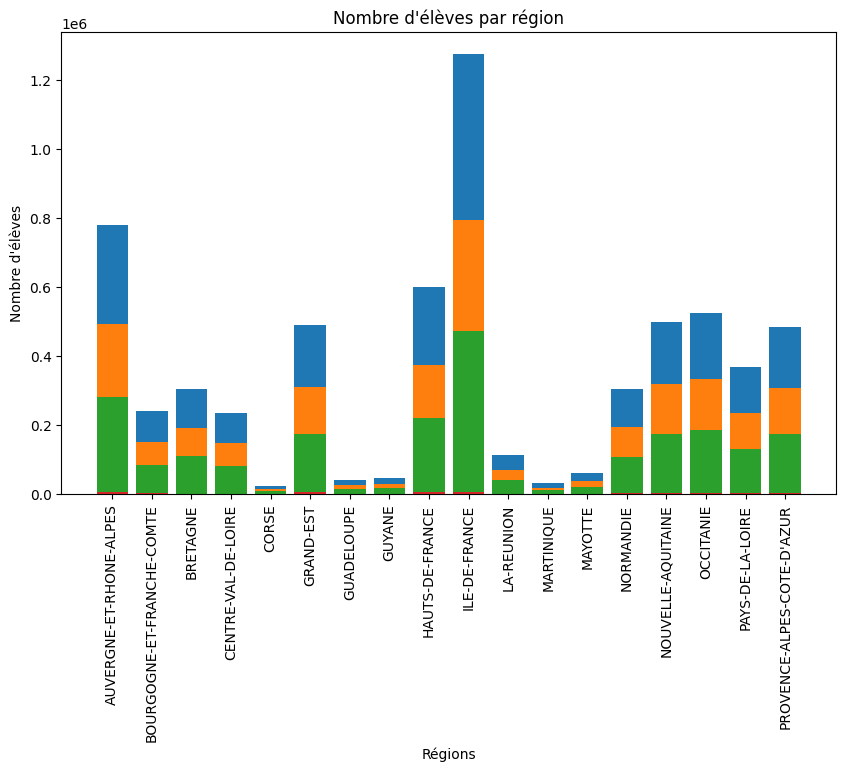

In [216]:
plt.figure(figsize = (10,6))
plt.bar(data_region22['region_academique'], height = data_region22['nombre_total_eleves'])
plt.bar(data_region22['region_academique'], height = data_region22['Eleve Élémentaire Total'])
plt.bar(data_region22['region_academique'], height = data_region22['Eleve Maternelle Total'])
plt.bar(data_region22['region_academique'], height = data_region22['Eleve en Handicap'])

plt.title("Nombre d'élèves par région")
plt.xlabel('Régions')
plt.ylabel("Nombre d'élèves")
plt.xticks(rotation=90)

plt.show()

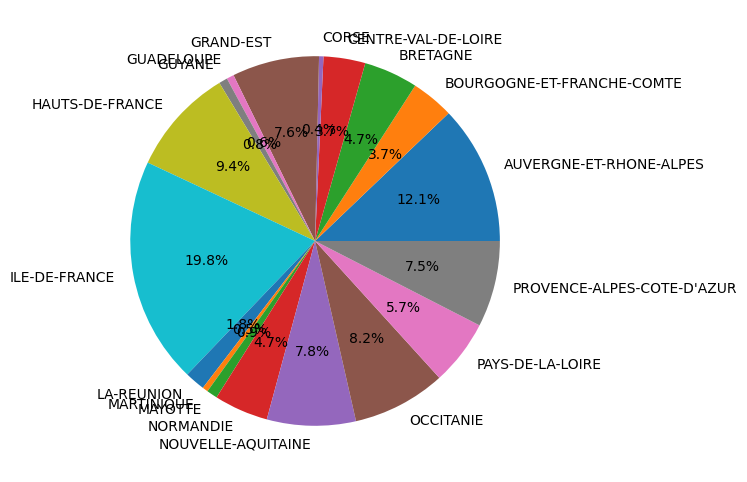

In [217]:
plt.figure(figsize=(8, 6))
plt.pie(data_region22['nombre_total_eleves'], labels=data_region22['region_academique'], autopct='%1.1f%%')
plt.show()

In [218]:
custom_colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#76d7c4', '#f39c12', '#34495e', '#1abc9c', '#9b59b6', '#3498db']
fig = px.pie(data_region22, values='nombre_total_eleves', names='region_academique', hole=0.4, title='Eleve par Region', color_discrete_sequence = custom_colors)

fig.show()

In [219]:
import plotly.express as px

fig = px.bar(data_frame=data_region22, 
             x='region_academique', 
             y='nombre_total_eleves', 
             title='Nombre total d\'élèves par région')
fig.show()
